In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
import nltk


In [2]:
#!pip install nltk
#!pip install svgling
#!pip install scipy
#!pip install transformers


In [3]:
# import nltk

# nltk.download('maxent_ne_chunker')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('words')
# nltk.download('vader_lexicon')




In [4]:
reviewdf = pd.read_csv(r'D:\Python\scrapping\amazon_reviews - Copy.csv')
reviewdf.head()

,names,reviewtitles,ratings,reviews
0,Aryadipto,"Can't say I'm an audiophile, but the bass on t...",5,One of most well fitting headphones I've ever ...
1,Vishal Vir Singh,it is fabolous,4,it is phenomenal but does not have a point por...
2,Kumar,OKAY FOR ONLINE CLASS NOT FOR MUSIC,4,I bought this for two reason. 1. ONLINE CLASS....
3,Pankaj Mahajan,Looks good but isn't very durable.,4,The headphone is well built - I haven't expose...
4,Habeeb Al-deen,Simply Amazing..,5,Just go for it!!!


In [5]:
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   names         476 non-null    object
 1   reviewtitles  476 non-null    object
 2   ratings       476 non-null    int64 
 3   reviews       461 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.0+ KB


In [6]:
print(reviewdf.isnull().any())
print(reviewdf.isnull().values.any())



names           False
reviewtitles    False
ratings         False
reviews          True
dtype: bool
True


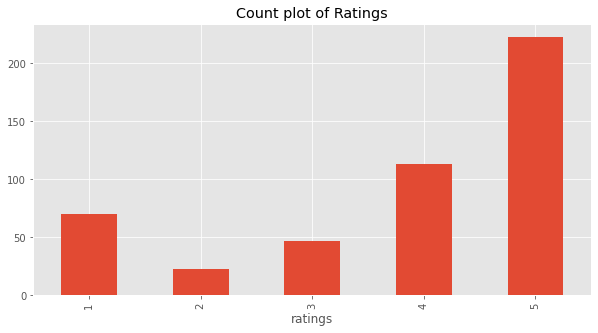

In [7]:
ax = reviewdf['ratings'].value_counts().sort_index().plot(kind='bar',figsize=(10,5))
ax.set_xlabel('ratings')
ax.set_title('Count plot of Ratings')
plt.show()

In [8]:
example = reviewdf['reviews'][50]
print(example)
tokens = nltk.word_tokenize(example)[:10]

the wires arent detachable which is pretty annoying. you cant hear anything else while using these which is nice. great for extended usage. not optimized for music. bass is okay-ish. mic is really good for the price range.


In [9]:
tagged = nltk.pos_tag(tokens)

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  the/DT
  wires/NNS
  arent/VBP
  detachable/JJ
  which/WDT
  is/VBZ
  pretty/JJ
  annoying/VBG
  ./.
  you/PRP)


In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [12]:
reviewdf['reviews'] = reviewdf['reviews'].astype(str)
reviewdf['names'] = reviewdf['names'].astype(str)

In [13]:
dict = {}
for i ,row in tqdm(reviewdf.iterrows(),total=len(reviewdf)):
    review = row['reviews']
    myID = row['names']
    dict[myID] = sia.polarity_scores(review)

  0%|          | 0/476 [00:00<?, ?it/s]

In [14]:
dict

{'Aryadipto': {'neg': 0.024, 'neu': 0.802, 'pos': 0.174, 'compound': 0.9167},
 'Vishal Vir Singh': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Kumar': {'neg': 0.1, 'neu': 0.737, 'pos': 0.162, 'compound': 0.6268},
 'Pankaj Mahajan': {'neg': 0.065,
  'neu': 0.764,
  'pos': 0.171,
  'compound': 0.9904},
 'Habeeb Al-deen': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Bharath': {'neg': 0.047, 'neu': 0.775, 'pos': 0.178, 'compound': 0.9852},
 'Abner': {'neg': 0.048, 'neu': 0.734, 'pos': 0.219, 'compound': 0.9946},
 'Rajarshi Bhattacharya': {'neg': 0.423,
  'neu': 0.577,
  'pos': 0.0,
  'compound': -0.296},
 'KAZURI': {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369},
 'Siparna Paul': {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.8292},
 'Shai': {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.7964},
 'surajbisoi': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Amazon Customer': {'neg': 0.087,
  'neu': 0.867,
  'pos': 0.047,
  'compound

In [15]:
vaders = pd.DataFrame(dict).T
vaders = vaders.reset_index().rename(columns={'index':'names'})
vaders.head()

,names,neg,neu,pos,compound
0,Aryadipto,0.024,0.802,0.174,0.9167
1,Vishal Vir Singh,0.000,1.000,0.000,0.0000
2,Kumar,0.100,0.737,0.162,0.6268
3,Pankaj Mahajan,0.065,0.764,0.171,0.9904
4,Habeeb Al-deen,0.000,1.000,0.000,0.0000


In [16]:
vaders = vaders.merge(reviewdf,how='left')
vaders.head()

,names,neg,neu,pos,compound,reviewtitles,ratings,reviews
0,Aryadipto,0.024,0.802,0.174,0.9167,"Can't say I'm an audiophile, but the bass on t...",5,One of most well fitting headphones I've ever ...
1,Vishal Vir Singh,0.000,1.000,0.000,0.0000,it is fabolous,4,it is phenomenal but does not have a point por...
2,Kumar,0.100,0.737,0.162,0.6268,OKAY FOR ONLINE CLASS NOT FOR MUSIC,4,I bought this for two reason. 1. ONLINE CLASS....
3,Pankaj Mahajan,0.065,0.764,0.171,0.9904,Looks good but isn't very durable.,4,The headphone is well built - I haven't expose...
4,Habeeb Al-deen,0.000,1.000,0.000,0.0000,Simply Amazing..,5,Just go for it!!!


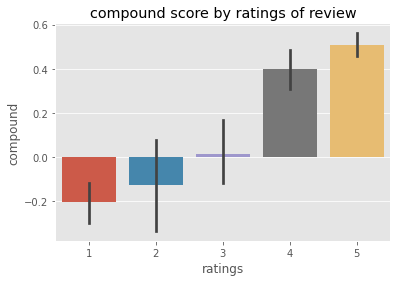

In [17]:
ax = sns.barplot(data = vaders , x ='ratings',y = 'compound')
ax.set_title('compound score by ratings of review')
plt.show()

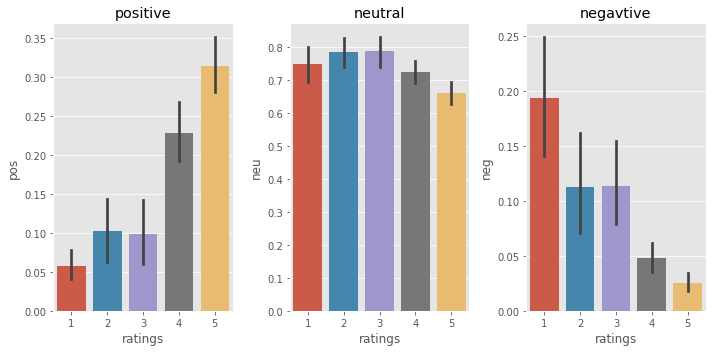

In [18]:
fir , axs = plt.subplots(1,3,figsize = (10,5))
sns.barplot(data = vaders , x = 'ratings',y = 'pos',ax = axs[0])
sns.barplot(data = vaders , x = 'ratings',y = 'neu',ax = axs[1])
sns.barplot(data = vaders , x = 'ratings',y = 'neg',ax = axs[2])
axs[0].set_title('positive')
axs[1].set_title('neutral')
axs[2].set_title('negavtive')
plt.tight_layout()
plt.show()

# Roberta model

In [19]:
# !pip uninstall torch
# !pip install torch==1.9.0+cpu -f https://download.pytorch.org/whl/torch_stable.html


In [20]:
from transformers import AutoTokenizer , AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
sia.polarity_scores(example)

{'neg': 0.103, 'neu': 0.634, 'pos': 0.263, 'compound': 0.8447}

In [23]:
encode = tokenizer(example,return_tensors='pt')
output = model(**encode)
scores = output[0][0].detach().numpy()
scores  = softmax(scores)
scores_dict = {'roberta_neg':scores[0],'roberta_neu':scores[1],'roberta_pos':scores[2]}



In [24]:
def polarity_score_roberta(example):
    encode = tokenizer(example,return_tensors='pt')
    output = model(**encode)
    scores = output[0][0].detach().numpy()
    scores  = softmax(scores)
    scores_dict = {'roberta_neg':scores[0],'roberta_neu':scores[1],'roberta_pos':scores[2]}
    return scores_dict



In [25]:
vader_resul_rename = {}
for key ,values in dict[myID].items():
    vader_resul_rename[f"vader_{key}"] = values


In [26]:
fulldata = {}
vader_result_rename = {}
for i, row in tqdm(reviewdf.iterrows(),total=len(reviewdf)):
    try:
        review = row['reviews']
        name = row['names']
        vader_result = sia.polarity_scores(review)
        for key ,values in vader_result.items():
            vader_result_rename[f"vader_{key}"] = values
        roberta_result = polarity_score_roberta(review)
        both = {**vader_result_rename,**roberta_result}
        fulldata[name] = both

    except RuntimeError:
        print(f"broker for id {name}")

  0%|          | 0/476 [00:00<?, ?it/s]

In [27]:
finalresult = pd.DataFrame(fulldata).T
finalresult = finalresult.reset_index().rename(columns={'index':'names'})
finalresult = finalresult.merge(reviewdf,how='left')
finalresult.head()

,names,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,reviewtitles,ratings,reviews
0,Aryadipto,0.024,0.802,0.174,0.9167,0.004827,0.025154,0.970019,"Can't say I'm an audiophile, but the bass on t...",5,One of most well fitting headphones I've ever ...
1,Vishal Vir Singh,0.000,1.000,0.000,0.0000,0.024598,0.232053,0.743349,it is fabolous,4,it is phenomenal but does not have a point por...
2,Kumar,0.100,0.737,0.162,0.6268,0.147498,0.412548,0.439954,OKAY FOR ONLINE CLASS NOT FOR MUSIC,4,I bought this for two reason. 1. ONLINE CLASS....
3,Pankaj Mahajan,0.065,0.764,0.171,0.9904,0.215072,0.446570,0.338357,Looks good but isn't very durable.,4,The headphone is well built - I haven't expose...
4,Habeeb Al-deen,0.000,1.000,0.000,0.0000,0.006535,0.118493,0.874972,Simply Amazing..,5,Just go for it!!!


In [28]:
finalresult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   names           476 non-null    object 
 1   vader_neg       476 non-null    float64
 2   vader_neu       476 non-null    float64
 3   vader_pos       476 non-null    float64
 4   vader_compound  476 non-null    float64
 5   roberta_neg     476 non-null    float64
 6   roberta_neu     476 non-null    float64
 7   roberta_pos     476 non-null    float64
 8   reviewtitles    476 non-null    object 
 9   ratings         476 non-null    int64  
 10  reviews         476 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ KB


In [29]:
vaders.describe()

,neg,neu,pos,compound,ratings
count,476.000000,476.000000,476.000000,476.000000,476.000000
mean,0.068544,0.706952,0.224540,0.298092,3.831933
std,0.131309,0.228585,0.237459,0.519415,1.435310
min,0.000000,0.000000,0.000000,-0.967700,1.000000
25%,0.000000,0.614750,0.039750,0.000000,3.000000
50%,0.000000,0.755000,0.164000,0.440400,4.000000
75%,0.087000,0.856750,0.327250,0.738200,5.000000
max,1.000000,1.000000,1.000000,0.995700,5.000000


In [30]:
finalresult.describe()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ratings
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,0.068544,0.706952,0.224540,0.298092,0.268260,0.226383,0.505357,3.831933
std,0.131309,0.228585,0.237459,0.519415,0.335368,0.200159,0.390958,1.435310
min,0.000000,0.000000,0.000000,-0.967700,0.001370,0.007907,0.001723,1.000000
25%,0.000000,0.614750,0.039750,0.000000,0.006580,0.046228,0.088669,3.000000
50%,0.000000,0.755000,0.164000,0.440400,0.061617,0.163691,0.548739,4.000000
75%,0.087000,0.856750,0.327250,0.738200,0.553163,0.358168,0.917702,5.000000
max,1.000000,1.000000,1.000000,0.995700,0.980515,0.912125,0.990639,5.000000


In [31]:
finalresult.isna().sum()
finalresult.isnull().sum()

names             0
vader_neg         0
vader_neu         0
vader_pos         0
vader_compound    0
roberta_neg       0
roberta_neu       0
roberta_pos       0
reviewtitles      0
ratings           0
reviews           0
dtype: int64

# comapring both models scores

In [32]:
finalresult.columns

Index(['names', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'reviewtitles', 'ratings',
       'reviews'],
      dtype='object')

In [33]:
numeric_cols = finalresult.select_dtypes(include=['float64', 'int64']).columns
numeric_cols
corr_matrix = finalresult[numeric_cols].corr()
corr_matrix

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ratings
vader_neg,1.000000,-0.218089,-0.343025,-0.567296,0.517992,-0.041135,-0.423280,-0.447197
vader_neu,-0.218089,1.000000,-0.841905,-0.245767,0.222556,0.250655,-0.319238,-0.170626
vader_pos,-0.343025,-0.841905,1.000000,0.550071,-0.500548,-0.218452,0.541217,0.411502
vader_compound,-0.567296,-0.245767,0.550071,1.000000,-0.685579,-0.231862,0.706804,0.523840
roberta_neg,0.517992,0.222556,-0.500548,-0.685579,1.000000,0.002330,-0.859004,-0.697105
roberta_neu,-0.041135,0.250655,-0.218452,-0.231862,0.002330,1.000000,-0.513968,-0.093870
roberta_pos,-0.423280,-0.319238,0.541217,0.706804,-0.859004,-0.513968,1.000000,0.646043
ratings,-0.447197,-0.170626,0.411502,0.523840,-0.697105,-0.093870,0.646043,1.000000


<AxesSubplot: >

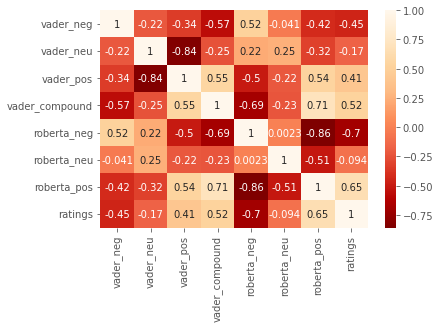

In [34]:
sns.heatmap(corr_matrix,annot=True,cmap='OrRd_r')

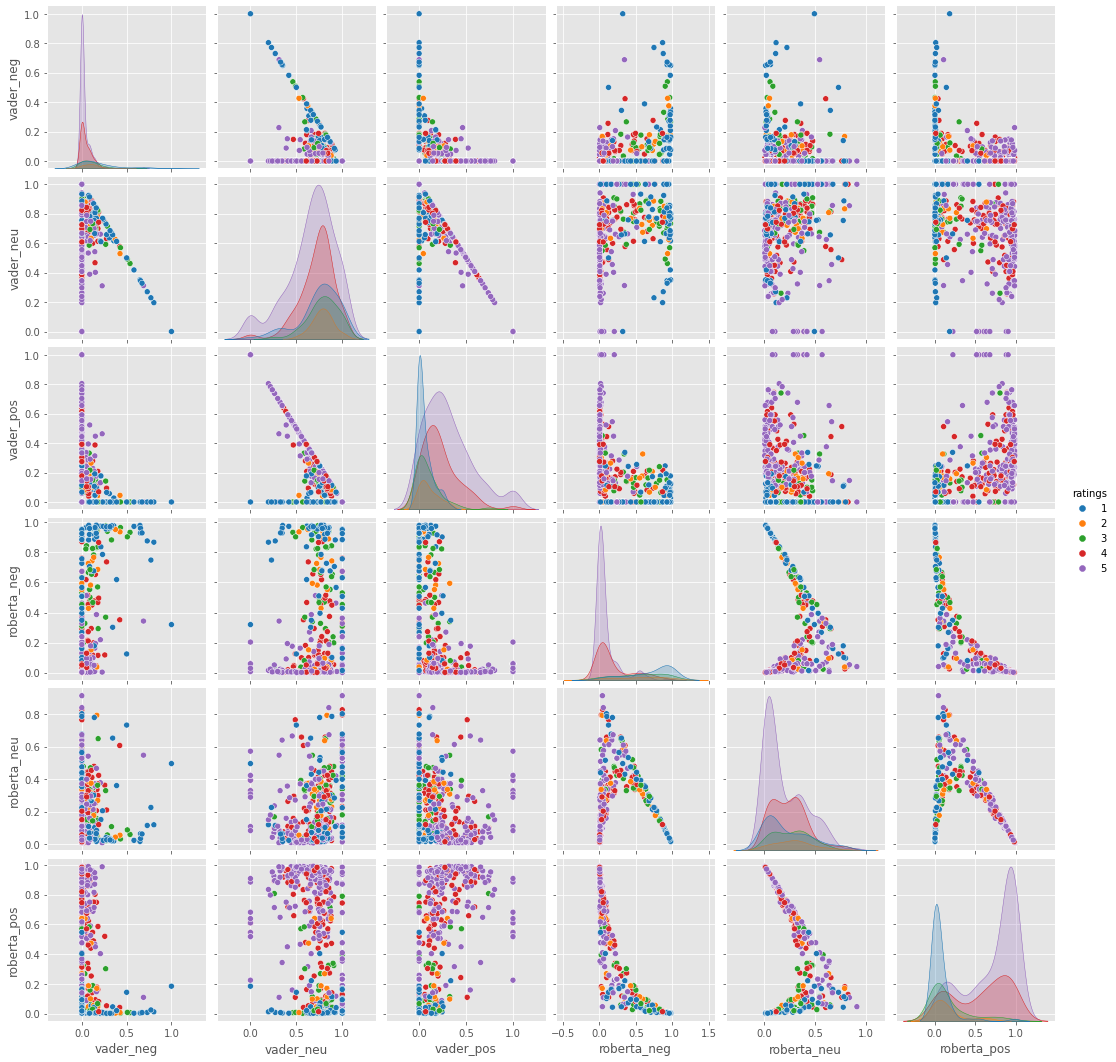

In [35]:
sns.pairplot(data = finalresult,
            vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],hue='ratings',palette='tab10')

In [36]:
finalresult.query('ratings == 1').sort_values('roberta_pos',ascending=False)['reviews'].values[:10]

array(["Wonderful productWonderful qualityIt's worth for money, cable quality is goodIn this range you can go with this",
       'i wanted to use this with my mobile but this is compitable with computer or laptops only',
       'I want to return this headphone....', 'nan',
       "Quality wise good but couldn't wear it for more than a hour!!",
       'No', 'Mic quality', 'avg product', 'Color combination alone',
       'I have got used product with out any any original packing and bills. Its open box and in used oncdition'],
      dtype=object)

# BERT model

In [37]:
token2 = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model2 = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [38]:
example = reviewdf['reviews'][0]
print(example)


One of most well fitting headphones I've ever purchased, still, your ears might hurt after long hours of usage.I have taken good care of this, and haven't used it extensively, so after 1 year(or so) of usage, it's with me without a scratch. So far, I have only watched movies, but man, the sound in this is good.Played some games, eg. Albion online and Honkai Impact 3 wearing these and it was a really fun experience.10/10 for a casual gamer like me. I can't say for hardcore gamers.


In [39]:
tokens = token2.encode(example,return_tensors='pt')

result = model2(tokens)
print(result)
print(result.logits[0])
int(torch.argmax(result.logits))+1



SequenceClassifierOutput(loss=None, logits=tensor([[-2.5003, -1.9051, -0.9262,  1.5365,  3.0766]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([-2.5003, -1.9051, -0.9262,  1.5365,  3.0766],
       grad_fn=<SelectBackward0>)


5

In [40]:
def bert_score(review):
    try:
        tokens = token2.encode(review,return_tensors='pt')
        result = model2(tokens)
        return int(torch.argmax(result.logits)) +1
    except AttributeError:
        return 1

In [ ]:
bert_dict = {'names':[],'scores':[]}
for name, review in tqdm(zip(reviewdf['names'],reviewdf['reviews']),total = len(reviewdf)):
    final_scores = bert_score(review)
    bert_dict['names'].append(name)
    bert_dict['scores'].append(final_scores) 
print(bert_dict)

  0%|          | 0/476 [00:00<?, ?it/s]

{'names': ['Aryadipto', 'Vishal Vir Singh', 'Kumar', 'Pankaj Mahajan', 'Habeeb Al-deen', 'Bharath', 'Abner', 'Rajarshi Bhattacharya', 'KAZURI', 'Siparna Paul', 'Shai', 'surajbisoi', 'Amazon Customer', 'Vignesh', 'kevin', 'Krishna Vasu', 'Priyansh Jain', 'Gazi Sifat', 'Prime', 'pooja', 'Debasish Acharya', 'Customer', 'Tobin George', 'Consumer', 'Saeesh N.', 'Fowad A.K', 'Suyog Parab', 'Akash negi', 'Suprovat misra', 'Samar Das', 'aditya_chaubey___', 'WaveOptic', 'Naveen SIngh', 'S Rohit Kumar', 'SwapMdk', 'Vetrivel prabhu', 'RKN', 'Ramteja', 'Aadil hussain Padder', 'Arpan Mukherjee', 'Rajat Singh', 'Soumya Deyasi', 'Mukesh Gupta', 'Abhilash Upadhya K', 'Deven Abhyankar', 'Abdulrahman', 'Akshay Srivastava', 'Shivam Bhoskar', 'RAKESH ARIKATHOTA', 'Param Kanti Roy', 'Bhawna', 'john', 'MaXimof KIRA', 'Amazon Customer', 'Aman Kumar', 'Saurav', 'SURESH KUMAR', 'Balakrishnan', 'Sahil Zedi', 'Justarandomguy', 'prasad Nandakumar pawar', 'zubi zubair', 'Arka', 'Sharad S.', 'Yousuf', 'yogesh mote'

In [ ]:
bertdf = pd.DataFrame.from_dict(bert_dict)
bertdf.head()

,names,scores
0,Aryadipto,5
1,Vishal Vir Singh,4
2,Kumar,2
3,Pankaj Mahajan,4
4,Habeeb Al-deen,5


In [ ]:
bertscoredf = bertdf.merge(reviewdf,how = 'left')
bertscoredf.head()

,names,scores,reviewtitles,ratings,reviews
0,Aryadipto,5,"Can't say I'm an audiophile, but the bass on t...",5,One of most well fitting headphones I've ever ...
1,Vishal Vir Singh,4,it is fabolous,4,it is phenomenal but does not have a point por...
2,Kumar,2,OKAY FOR ONLINE CLASS NOT FOR MUSIC,4,I bought this for two reason. 1. ONLINE CLASS....
3,Pankaj Mahajan,4,Looks good but isn't very durable.,4,The headphone is well built - I haven't expose...
4,Habeeb Al-deen,5,Simply Amazing..,5,Just go for it!!!


In [ ]:
columns_order = ['names','scores', 'ratings','reviewtitles','reviews']

In [ ]:
bertscoredf = bertscoredf[columns_order]
bertscoredf = bertscoredf.rename(columns={'scores':'bert_scores'})
bertscoredf.head()

,names,bert_scores,ratings,reviewtitles,reviews
0,Aryadipto,5,5,"Can't say I'm an audiophile, but the bass on t...",One of most well fitting headphones I've ever ...
1,Vishal Vir Singh,4,4,it is fabolous,it is phenomenal but does not have a point por...
2,Kumar,2,4,OKAY FOR ONLINE CLASS NOT FOR MUSIC,I bought this for two reason. 1. ONLINE CLASS....
3,Pankaj Mahajan,4,4,Looks good but isn't very durable.,The headphone is well built - I haven't expose...
4,Habeeb Al-deen,5,5,Simply Amazing..,Just go for it!!!
